In [53]:
# The code was removed by Watson Studio for sharing.

(0, Reps        1
Factor    100
Name: 0, dtype: int64)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from os import path
import re

#dataSetPath = './Data Files/'

In [ ]:
def _get_factors(lifts):
    return orm_factors_df.loc[orm_factors_df['Reps'] == reps]['Factor'].item()/100

#print(next(orm_factors_df.iterrows()))

## Get the ONE REP MAX Curve

DON'T RUN THIS IF USING THE FIELD FROM IBM 

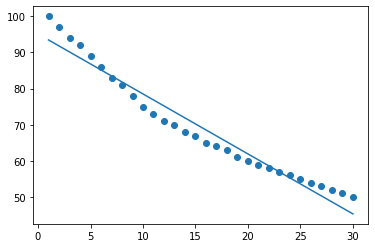

In [2]:
factors = pd.read_csv('Data Files/ORM Factors.csv')

#Linear Fit
regr = linear_model.LinearRegression()
X = np.array(factors['Reps']).reshape(-1,1)
regr.fit(X, factors['Factor'])


#poly_reg = PolynomialFeatures(degree = 2)
#X_poly = poly_reg.fit_transform([factors['Reps']])
#print(X_poly)
#regressor = linear_model.LinearRegression()
#regressor.fit(X_poly, factors['Factor'])

#print(regressor)

#fact_pred = regressor.predict(poly_reg.transform(X_poly))
#print(fact_pred)


plt.scatter(X,factors['Factor'])
plt.plot(X, regr.predict(X))

Need to get the read part working


In [51]:
#lifts_df = pd.read_csv('Data Files/lifts.csv')
#print(_get_factor(2))

0.97


For now:


In [47]:
lifts = np.array([2,2,2,6,6,6])
weights = np.array([175,175,180,145,145,150])
lift_df = pd.DataFrame({'lifts' : lifts, 'weights' : weights})
lift_df = lift_df.assign(volume=lambda x: x.lifts * x.weights)
lift_df.insert(3,'ORM',0.0)

lift_df.head()

#print(f"Total Lifts: {lifts.sum()}")
#print(f"Total Volume: {volumes.sum()}")
#print(f"Mean reps: {round(lifts.mean(), 3)}")
#print(f"Mean weigt: {round(weights.mean(), 1)}")
#print(f"Max Lift: {weights.max()}")
#print(regr.predict(lifts.mean().reshape(1,-1)).sum()/100)
#print(f"One Rep max: {round(weights.mean()*100/regr.predict(lifts.mean().reshape(1,-1)).sum(), 1)}")
#print(f"|{volumes.sum()}-{round(weights.mean()*100/regr.predict(lifts.mean().reshape(1,-1)).sum(), 1)}")

,lifts,weights,volume,ORM
0,2,175,350,0.0
1,2,175,350,0.0
2,2,180,360,0.0
3,6,145,870,0.0
4,6,145,870,0.0


In [22]:
lifts = np.array([5,5,5,5,5])
weights = np.array([155])
volumes = lifts*weights

print(f"Total Lifts: {lifts.sum()}")
print(f"Total Volume: {volumes.sum()}")
print(f"Mean reps: {round(lifts.mean(), 3)}")
print(f"Mean weigth: {round(weights.mean(), 1)}")
print(f"One Rep max: {round(weights.mean()/regr.predict(lifts.mean().reshape(1,-1)).sum(), 3)}")

Total Lifts: 25
Total Volume: 3875
Mean reps: 5.0
Mean weigth: 155.0
One Rep max: 176.584


In [52]:
xdic={'X': {11: 300, 12: 170, 13: 288, 14: 360, 15: 319, 16: 330, 17: 520, 18: 345, 19: 399, 20: 479}}
ydic={'y': {11: 305000, 12: 270000, 13: 360000, 14: 370000, 15: 379000, 16: 405000, 17: 407500, 18: 450000, 19: 450000, 20: 485000}}
X=pd.DataFrame.from_dict(xdic)
y=pd.DataFrame.from_dict(ydic)
import numpy as np
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

print(X, y)
print(X_seq)

      X
11  300
12  170
13  288
14  360
15  319
16  330
17  520
18  345
19  399
20  479          y
11  305000
12  270000
13  360000
14  370000
15  379000
16  405000
17  407500
18  450000
19  450000
20  485000
[[170.        ]
 [171.17056856]
 [172.34113712]
 [173.51170569]
 [174.68227425]
 [175.85284281]
 [177.02341137]
 [178.19397993]
 [179.36454849]
 [180.53511706]
 [181.70568562]
 [182.87625418]
 [184.04682274]
 [185.2173913 ]
 [186.38795987]
 [187.55852843]
 [188.72909699]
 [189.89966555]
 [191.07023411]
 [192.24080268]
 [193.41137124]
 [194.5819398 ]
 [195.75250836]
 [196.92307692]
 [198.09364548]
 [199.26421405]
 [200.43478261]
 [201.60535117]
 [202.77591973]
 [203.94648829]
 [205.11705686]
 [206.28762542]
 [207.45819398]
 [208.62876254]
 [209.7993311 ]
 [210.96989967]
 [212.14046823]
 [213.31103679]
 [214.48160535]
 [215.65217391]
 [216.82274247]
 [217.99331104]
 [219.1638796 ]
 [220.33444816]
 [221.50501672]
 [222.67558528]
 [223.84615385]
 [225.01672241]
 [226.18729097]
 [227.3

# An aside
Given a dataframe:

1 1
2 .97
3 .94
4 .90
5 .87

and an array
[3,3,2,2,2]

return 
[.94, .94, .97, .97, .97]

In [1]:
import pandas as pd
import numpy as np


In [2]:
source_df=pd.DataFrame(data={'Reps': [1,2,3,4,5], 'Factor':[1.0, 0.97, 0.94, 0.90, 0.87]})
source_df.head()

,Reps,Factor
0,1,1.00
1,2,0.97
2,3,0.94
3,4,0.90
4,5,0.87


In [3]:
input = np.array([3,3,2,2,2])
print(input)

[3 3 2 2 2]


In [6]:
idx, cols = pd.factorize(source_df['Reps'])
print(idx,cols,sep='\n')
#source_df.reindex(cols, axis=1).to_numpy()[np.arange(len(source_df)), idx]
source_df.reindex(cols)

[0 1 2 3 4]
Int64Index([1, 2, 3, 4, 5], dtype='int64')


,Reps,Factor
1,2.0,0.97
2,3.0,0.94
3,4.0,0.90
4,5.0,0.87
5,NaN,NaN
